<a href="https://colab.research.google.com/github/tatiana-ka/exploring-scraped-data-imdb/blob/main/Exploring_Scaped_IMDb_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Quick data exploration**

In this notebook I will do a brief exploration and plotting of the IMDb data that I have scraped (see another notebook for the scraping script). The goal of scraping was not analyze the scraped data only. There are plenty of IMDb datasets available to do that. Scraping is part of a bigger project idea for studying creativity through text mining. 
Nonetheless, since I have this chunck of the data, I might as well do a quick exploration to see what is in there. 

*Disclaimer: this is in no way an complete exploration and analysis of this data chunk. There is much more that one can do with it. This notebook is more of a quick familiarization and a few plotting excersises.*

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import scipy.stats

In [ ]:
from google.colab import files, drive # connecting to my google drive since i'm working in colab

drive.mount('/content/drive')

In [ ]:
imdb_rated = pd.read_csv('/content/drive/MyDrive/movies_scraped/imdb_merged.csv', index_col = 'Unnamed: 0')

In [ ]:
imdb_rated.head() 

,title,imdbID,duration,genre,imdb_rating,metascore,synopsys,votes,gross,year,...,Family,Fantasy,Animation,Biography,Music,History,Sport,Musical,War,Western
0,Harry Potter and the Sorcerer's Stone,tt0241527,152.0,Adventure Family Fantasy,7.6,64.0,\nAn orphaned boy enrolls in a school of wizar...,693017,317575550.0,2001,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,The Lord of the Rings: The Fellowship of the Ring,tt0120737,178.0,Action Adventure Drama,8.8,92.0,\nA meek Hobbit from the Shire and eight compa...,1721432,315544750.0,2001,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,The Matrix,tt0133093,136.0,Action Sci-Fi,8.7,73.0,\nWhen a beautiful stranger leads computer hac...,1741678,171479930.0,1999,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Fight Club,tt0137523,139.0,Drama,8.8,66.0,\nAn insomniac office worker and a devil-may-c...,1928126,37030102.0,1999,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Catch Me If You Can,tt0264464,141.0,Biography Crime Drama,8.1,75.0,"\nBarely 21 yet, Frank is a skilled forger who...",877182,164615351.0,2002,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
imdb_rated.notna().sum()

title          51440
imdbID         51440
duration       47492
genre          50573
imdb_rating    51440
metascore       8921
synopsys       51440
votes          51440
gross           7211
year           51440
list_genre     50573
Drama          50573
Comedy         50573
Thriller       50573
Horror         50573
Action         50573
Romance        50573
Crime          50573
Adventure      50573
Mystery        50573
Sci-Fi         50573
Family         50573
Fantasy        50573
Animation      50573
Biography      50573
Music          50573
History        50573
Sport          50573
Musical        50573
War            50573
Western        50573
dtype: int64

#### **Exploring IMDb Rating**

**General overview:**

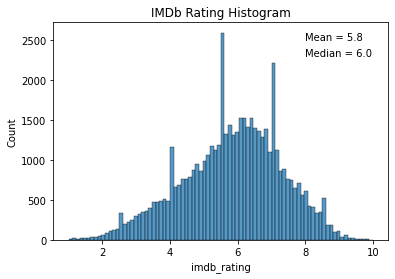

In [ ]:
sns.histplot(imdb_rated.imdb_rating)
plt.text(8, 2500, 'Mean = ' + str(round(imdb_rated.imdb_rating.mean(), 1)))
plt.text(8, 2300, 'Median = ' + str(round(imdb_rated.imdb_rating.median(), 1)))
plt.title('IMDb Rating Histogram')
plt.show()

That's a nice bell, alsmost new skewness and weirdness... quite rarely I find those...

**Movie Rating over Time**

In [ ]:
rating_years = imdb_rated.groupby(by = ['year']).imdb_rating.agg(['count','mean', 'std', 'max']) #getting mean and standard error per year
rating_years

,count,mean,std,max
year,,,,
1999,1249,5.772858,1.201278,8.8
2000,1285,5.800623,1.313327,9.1
2001,1323,5.878836,1.314428,9.0
2002,1328,5.876732,1.261705,9.0
2003,1377,5.897240,1.408031,9.2
2004,1508,5.996154,1.368674,9.8
2005,1741,5.987593,1.416697,9.1
2006,1921,5.812858,1.443428,9.5
2007,1971,5.881481,1.417246,9.4


Seems that an occasional movie from 2020 and 2021 crawled in. This is odd... maybe these are delayed releases that were originally planned for 2019. I'll drop them for now.  

In [ ]:
rating_years = rating_years[rating_years.index < 2020]

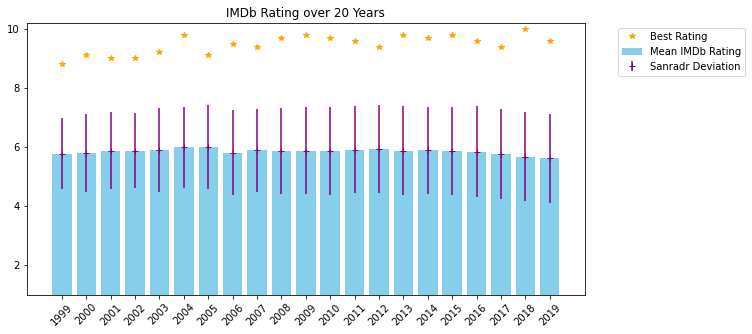

In [ ]:
plt.subplots(figsize=(10, 5))
plt.bar(rating_years.index, rating_years['mean'], color = 'skyblue', label = 'Mean IMDb Rating')
plt.errorbar(rating_years.index, rating_years['mean'], yerr = rating_years['std'],linestyle = 'None', color = 'purple', fmt = '+', label = 'Sanradr Deviation')
plt.plot(rating_years.index, rating_years['max'],linestyle = 'None', marker = '*', color = 'orange', label = 'Best Rating')
plt.xticks(rating_years.index, rotation = 45)
plt.ylim(1, 10.2)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.title('IMDb Rating over 20 Years')
plt.show()


In [ ]:
print('Correlation Between IMDb Rating and Year:')
print('.....................\n Pearson Correlation')
print(scipy.stats.pearsonr(imdb_rated.imdb_rating, imdb_rated.year))
print('.....................\n Spearman Correlation')
scipy.stats.spearmanr(imdb_rated.imdb_rating, imdb_rated.year)

Correlation Between IMDb Rating and Year:
.....................
 Pearson Correlation
(-0.03383447230957756, 1.6438864807421994e-14)
.....................
 Spearman Correlation


SpearmanrResult(correlation=-0.04254981137613027, pvalue=4.699898309354142e-22)

Data vozualization does not show any indication of relationship between year of production and average movie ratings. Nonetheless, checked the correlation since there is a lay belief that the movie rating is higher for older rather than for newer movies. The results show a very small, yet significant correlation. It could be that this is a false positive driven by the large sample size. 

**Movie Rating and its Length**

Before I can start exploring, I need to take care of some outliers. Without this cleaning even a histigram is quite uninformative (see below). 

It is quite common for duration to have extremes since duration of the movie could be part of artistic expression. See "Qw", for example, it is the longest movie in the dataset.  

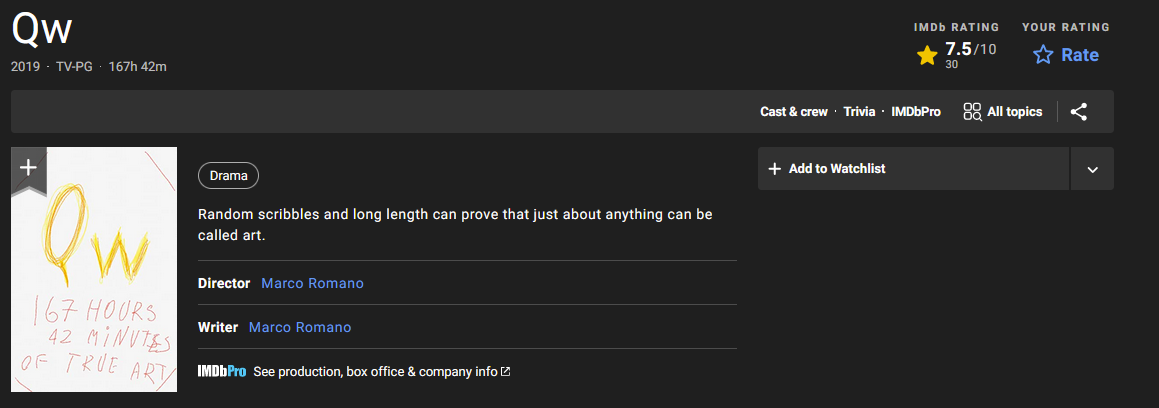

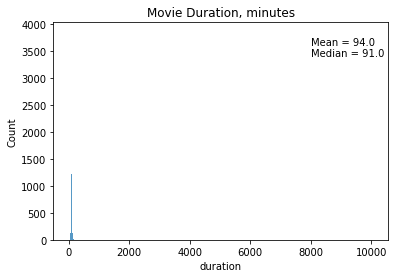

In [ ]:
sns.histplot(imdb_rated.duration)
plt.text(8000, 3600, 'Mean = ' + str(round(imdb_rated.duration.mean(), 1)))
plt.text(8000, 3400, 'Median = ' + str(round(imdb_rated.duration.median(), 1)))
plt.title('Movie Duration, minutes')
plt.show()

I will deal with the outliers using Median Absolute Deviation approach. The details on the method can be found in Leys et al. 2013 paper ("Detecting outliers: Do not use standard deviation around the mean, use absolute deviation around the median"). 

MAD is defined using the following formula:

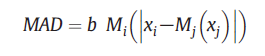

Usually *b* = 1.4826. It is a constant linked to the assumption of normality of the data, disregarding the abnormality induced by outliers (Rousseeuw & Croux, 1993).
After calculating MAD, it is used to define the thresholds. 
For this *level of decision* needs to be selected. The defalut is *2.5*. unless there are specific reasons, the default is reccomended (other options are *3* and *2*). 

Here is a formula with *level of decision = 3*:


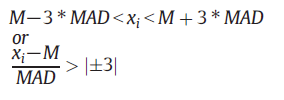

In [ ]:
Median1 = imdb_rated.duration.median()
imdb_rated['Med_abs_dev'] = abs(imdb_rated.duration - Median1) 
Median2 = imdb_rated['Med_abs_dev'].median()
Upper_limit = Median1 + 2.5*Median2*1.4826 #b = 1.4826, level of decision = 2.5
Lower_limit = Median1 - 2.5*Median2*1.4826

print('upper limit: ' + str(Upper_limit))
print('lower_limit: ' + str(Lower_limit))

upper limit: 124.35849999999999
lower_limit: 57.6415


In [ ]:
imdb_rated['duration_truncated'] = imdb_rated.duration
imdb_rated.loc[imdb_rated['duration_truncated'] > Upper_limit,  'duration_truncated'] = Upper_limit
imdb_rated.loc[imdb_rated['duration_truncated'] < Lower_limit,  'duration_truncated'] = Lower_limit

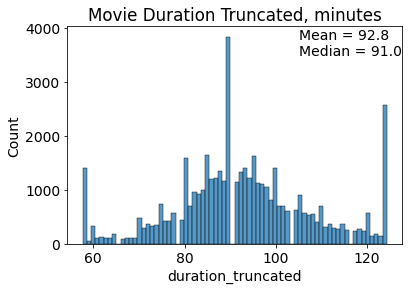

In [ ]:
sns.histplot(imdb_rated.duration_truncated)
plt.text(105, 3500, 'Mean = ' + str(round(imdb_rated.duration_truncated.mean(), 1)) + '\nMedian = ' + str(round(imdb_rated.duration_truncated.median(), 1)))
plt.title('Movie Duration Truncated, minutes')
plt.show()

That looks much better. Nonetheless, such truncaton is not ideal: now there is a mass at both ends of the distribution. 

<u>Side note</u>: *it seems that the movie duration has a magic number of 90minutes that many hit.* 



Now to relationship between the rating and movie duration. I find it quite tough to get a nice visualization of a correlation, eslecially a weak one. I like the plot below for that: it packs everyting together nicely.  

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


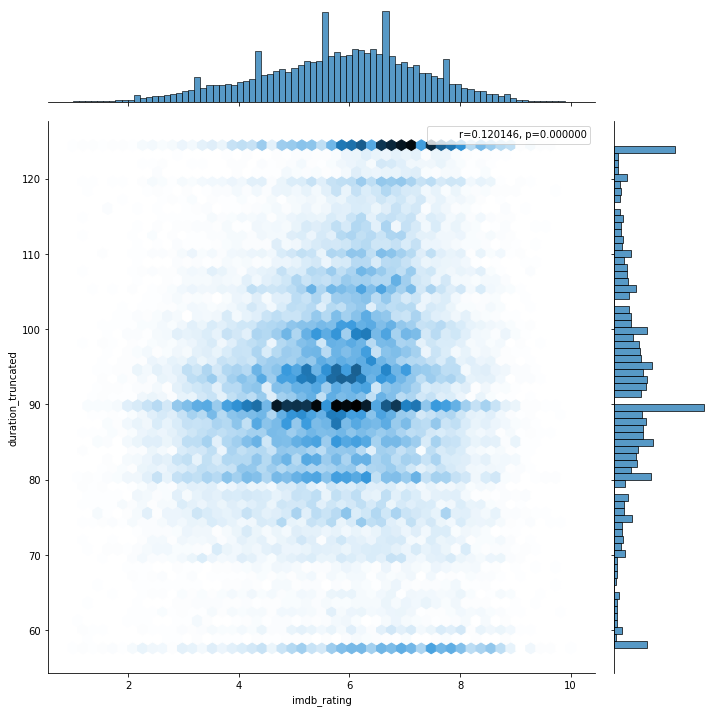

In [ ]:
cor_plot = sns.jointplot(data = imdb_rated, x = 'imdb_rating', y = 'duration_truncated', kind = 'hex', size = 10)
imdb_dur_known = imdb_rated[imdb_rated.duration.notna()].copy() #getting a subset without NaNs
r, p = scipy.stats.pearsonr(imdb_dur_known.imdb_rating, imdb_dur_known.duration_truncated) #running correlation
# "if you choose to write your own legend, then you should adjust the properties" (took from stackoverflow)
phantom, = cor_plot.ax_joint.plot([], [], linestyle="", alpha=0)
cor_plot.ax_joint.legend([phantom],['r={:f}, p={:f}'.format(r,p)])
plt.show()

There is rather small (12%) but significant (p < .001) corelation between movie duration and rating. Would not conclude from this that longer movie have a higher probablitily of getting higher ratings. Rather it is likely a 3rd variable influence: in the movies are "build" to be the blockbusters the creators can allow themselves to throw in a few extra scenes for the fans, as a result increasing the overall duration. 



**Movie Rating and its Genre**

Different genres may get different IMDb ratings. This could be because some genres, e.g. comedies, are more likely to produce lowbrow movies, while others may more frequently reach for the stars (e.g. history). This judgement, however only based on my personal experience in movie watching, and, of course, is biased by my taste preferences. 
Just looking at the movie ratings across genres could give some insights into whether my intuition is correct. However, this would be a one-sided picture: If there are many movies produced within the genre, I might observe regression to the mean effect. In other words, if there are many movies, they can't all be bad or good. If anything, it's more likely that quantity will trump quality. Hence, having information about the number of movies of a specific genre (genre popularity in some way), would provide a fuller picture. 

To get the information about the average rating (including standard deviation) and number of movies per genre, I need to:
1. Explode df first, so that each genre has a separate line (meaning that if the instance has 2 genres it will be exploded to 2 rows). Here it works nicely the genre for each movie is a list. 
2. Group by genre and get count, mean and sem, and sort by mean.



In [ ]:
imdb_rated['list_genre'] = imdb_rated.genre.str.split() #make into list instread of string again
genre_focus = imdb_rated[['list_genre', 'imdb_rating']].copy()
genre_stats = genre_focus.explode('list_genre').groupby(['list_genre']).imdb_rating.agg(['count', 'mean', 'std']).reset_index() #make a table with unique genre and stats
genre_stats = genre_stats.sort_values(by = ['count'], ascending=False).reset_index(drop = True)

genre_stats

,list_genre,count,mean,std
0,Drama,25768,6.184558,1.275080
1,Comedy,15545,5.972602,1.352382
2,Thriller,8765,5.314512,1.360320
3,Horror,8699,4.730199,1.359145
4,Action,6718,5.440101,1.503547
5,Romance,5932,6.053490,1.182727
6,Crime,5067,5.826564,1.293793
7,Adventure,3579,5.716066,1.479161
8,Mystery,3288,5.595529,1.366406
9,Sci-Fi,2632,5.168541,1.521656


News, Reality-TV, Talk-Show and Game-Show genre seem to be quite rare, so I will not plot them. Other than that the table is ready for plotting.

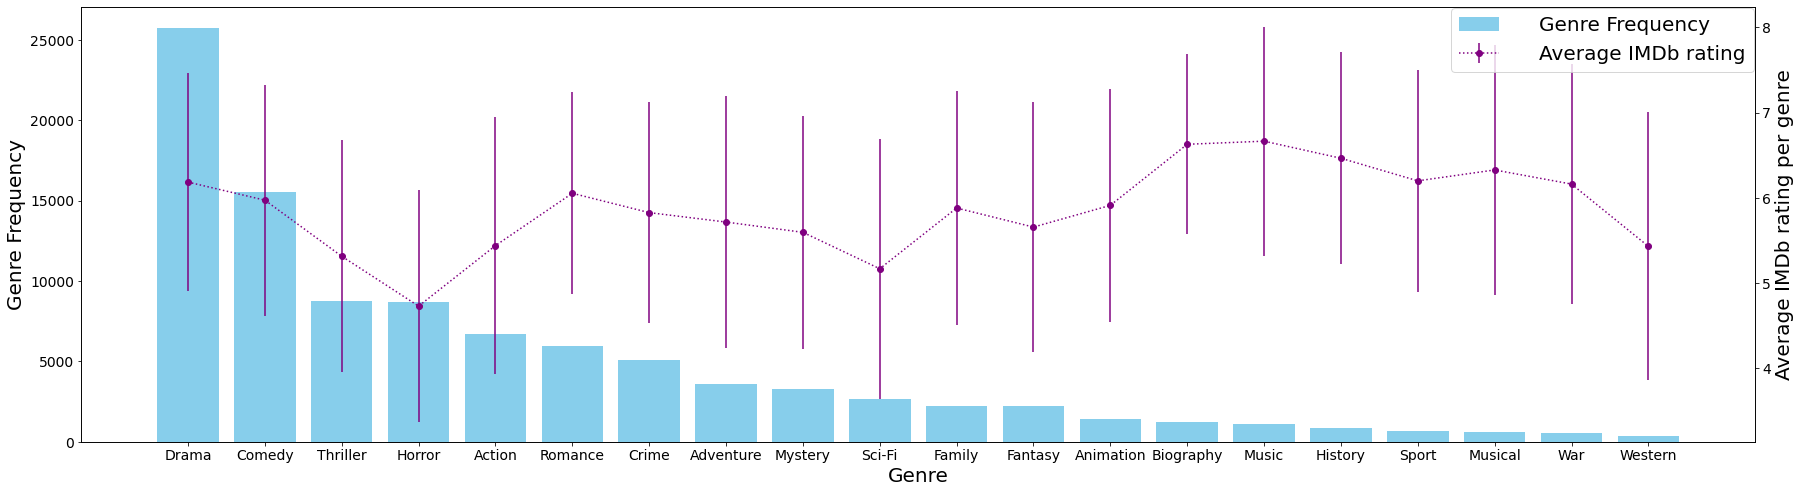

In [ ]:
plt.rcParams['font.size'] = '14' #changes font size globally
fig, ax = plt.subplots(figsize=(30, 8)) #sets wider chart to fit all the genres nicely
ax.bar(genre_stats.list_genre[:-4], genre_stats['count'][:-4],color = 'skyblue', label = 'Genre Frequency') #plot bars with genre frequency
ax.set_xlabel('Genre', size = 20.0) #name the genre x-axis
ax.set_ylabel('Genre Frequency', size = 20.0) #name genre y-axis

ax2 = ax.twinx() #add second y-axis
ax2.errorbar(genre_stats.list_genre[:-4], genre_stats['mean'][:-4], yerr = genre_stats['std'][:-4],fmt = '-o', linestyle = ':', color = 'purple', label = 'Average IMDb rating') #plot average movie ratings + standard error for each genre
ax2.set_ylabel('Average IMDb rating per genre', size = 20.0) # name movie ratings y-axis
fig.legend(handletextpad=2, loc = 'upper center', bbox_to_anchor = (0.742, 0.859), fontsize = 20.0) #get and place the legend
plt.show()

It seems that Drama and Comedy are the most common genres. These genres perform quite ok in terms of the ratings with strong 6 for Comedy and even above 6 for Drama. Comedy and Drama, however, are not the most well-performing genres. Here such less common categories such as Biography, Music and History take over with Music and Histiry coming relatively close to 7 out of 10 for the mean rating. 

The toughest genre in the last 20 years seems to be Horror: it's among the 5 most common genres, but has the average rating below 5. I wonder if it's because horror movies are actually predominantly bad, or because they are scary and this negative emotion spills over on the rating... 

#### **Exploring over time**

**Movie Production Pace over Time**

In [ ]:
year_summary = imdb_rated[imdb_rated.year < 2020].groupby(['year']).imdb_rating.agg(['count']).reset_index() #select movies before 2020, group by year, count unique movie ids per year, make year into a column
year_summary 

,year,count
0,1999,1249
1,2000,1285
2,2001,1323
3,2002,1328
4,2003,1377
5,2004,1508
6,2005,1741
7,2006,1921
8,2007,1971
9,2008,2278


Could have also used ```rating_years``` dataframe generated at the beginning of exploration section. 

In [ ]:
N = year_summary['count'].sum() # total number of movies
r, p = scipy.stats.pearsonr(year_summary['year'], year_summary['count']) #correlation of time and number of movies

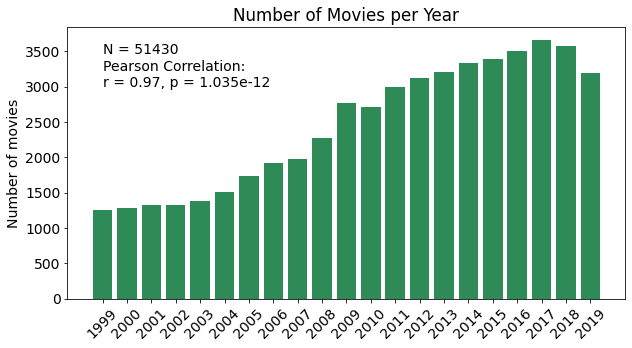

In [ ]:
plt.subplots(figsize = (10, 5))
plt.bar(year_summary.year, year_summary['count'], color = 'seagreen')
plt.xticks(year_summary.year, rotation = 45)
plt.ylabel('Number of movies')
plt.title('Number of Movies per Year')
plt.text(1999, 3000, 'N = ' + str(N) + '\nPearson Correlation:' + '\nr = ' + str(round(r,2)) + ', p = ' + str(round(p, 15)))

plt.show()

In [ ]:
scipy.stats.spearmanr(year_summary['year'], year_summary['count']) 

SpearmanrResult(correlation=0.9701298701298702, pvalue=3.812331851155714e-13)

Since about 2004 the pace of movie prodiction grows almost linearly over the years. I checked major events within IMDb on Wikipedia and did not find hostorical events around 2004 that would signal change in the data collection. Hence, probably, the observed effect comes from the changes in the industry rather than the data. It will be interesting to see how the next decade unforlds for feature films considering strong operation of streaming platforms in the movie-making business. 

**Genre Trends across Years**

Now I will dig into genres a bit more. 
From the chart in the previous section it is already visible that Drama, Comedy and Thriller are the 3 most popular genres. Before diving into genre trends across years, I'll do one more step in exploring genres and have a look how they co-occuer. It is no secret that movies are frequently given more than one genre. The two combinations that come to my mind are: romantic comedy or thriller drama. Let's see if this is the most popular combo as well. 

To explore this I will create a heatmap chart. For this chart I need to prepare my data first: create a matrix that shows the number of times each two genres co-occur. 

Actions:
1. Get the names of genre columns;
2. Create a list with genre comlumn names for simplicity;
3. Drop movies that have no genre information and subset dataframe to only keep genre dummies;
4. Create a co-occurance matrix;
5. Convert the matrix into numpy array so that I can easily set the diaganal values to 0 (if I do not do that, the heatmap will light up on the diaganal and blend out all the other co-occurences because they'll have smaller values);
6. Create a heatmap.


In [ ]:
imdb_rated.columns

Index(['title', 'imdbID', 'duration', 'genre', 'imdb_rating', 'metascore',
       'synopsys', 'votes', 'gross', 'year', 'list_genre', 'Drama', 'Comedy',
       'Thriller', 'Horror', 'Action', 'Romance', 'Crime', 'Adventure',
       'Mystery', 'Sci-Fi', 'Family', 'Fantasy', 'Animation', 'Biography',
       'Music', 'History', 'Sport', 'Musical', 'War', 'Western'],
      dtype='object')

In [ ]:
genres = ['Drama', 'Comedy',
       'Thriller', 'Horror', 'Action', 'Romance', 'Crime', 'Adventure',
       'Mystery', 'Sci-Fi', 'Family', 'Fantasy', 'Animation', 'Biography',
       'Music', 'History', 'Sport', 'Musical', 'War', 'Western']

In [ ]:
genre = imdb_rated[imdb_rated.genre.notna()][genres] #just df with genre columns

In [ ]:
cooc = genre.T.dot(genre) #creating a matrix
cooc

,Drama,Comedy,Thriller,Horror,Action,Romance,Crime,Adventure,Mystery,Sci-Fi,Family,Fantasy,Animation,Biography,Music,History,Sport,Musical,War,Western
Drama,25768.0,5520.0,3072.0,1394.0,2105.0,3797.0,2925.0,904.0,1573.0,631.0,935.0,775.0,172.0,957.0,651.0,641.0,377.0,228.0,395.0,115.0
Comedy,5520.0,15545.0,419.0,1343.0,1333.0,2945.0,1003.0,1199.0,277.0,387.0,739.0,600.0,474.0,151.0,369.0,48.0,185.0,241.0,41.0,34.0
Thriller,3072.0,419.0,8765.0,2634.0,1260.0,267.0,1407.0,166.0,1182.0,544.0,26.0,135.0,4.0,25.0,16.0,42.0,10.0,7.0,49.0,30.0
Horror,1394.0,1343.0,2634.0,8699.0,746.0,120.0,351.0,200.0,1179.0,687.0,17.0,495.0,35.0,9.0,21.0,15.0,6.0,34.0,12.0,27.0
Action,2105.0,1333.0,1260.0,746.0,6718.0,174.0,1550.0,1518.0,207.0,690.0,109.0,402.0,275.0,83.0,25.0,104.0,61.0,23.0,106.0,62.0
Romance,3797.0,2945.0,267.0,120.0,174.0,5932.0,206.0,103.0,171.0,92.0,130.0,156.0,11.0,84.0,161.0,62.0,64.0,80.0,64.0,11.0
Crime,2925.0,1003.0,1407.0,351.0,1550.0,206.0,5067.0,165.0,573.0,36.0,28.0,52.0,30.0,163.0,31.0,31.0,19.0,21.0,4.0,14.0
Adventure,904.0,1199.0,166.0,200.0,1518.0,103.0,165.0,3579.0,102.0,290.0,462.0,462.0,626.0,72.0,20.0,38.0,17.0,15.0,18.0,30.0
Mystery,1573.0,277.0,1182.0,1179.0,207.0,171.0,573.0,102.0,3288.0,232.0,35.0,167.0,12.0,6.0,12.0,15.0,3.0,6.0,5.0,8.0
Sci-Fi,631.0,387.0,544.0,687.0,690.0,92.0,36.0,290.0,232.0,2632.0,33.0,144.0,55.0,3.0,16.0,5.0,3.0,16.0,11.0,10.0


In [ ]:
cooc = cooc.to_numpy() #convert to numpy array
np.fill_diagonal(cooc, 0) #fill diaganal with zeros

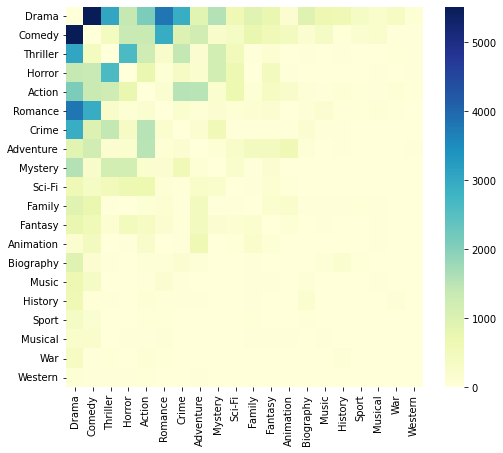

In [ ]:
plt.subplots(figsize=(8, 7))
sns.heatmap(cooc, cmap="YlGnBu", yticklabels = genres, xticklabels = genres) #need to define the tick labes with list of genre names those diappeared when converted df to np
plt.show()

Looks like Drama is a popular genre overall and to combine with. Especially so Drama & Comedy, Drama & Romance. The chart includes a lot of less popular genres making it a bit difficult to interpret. As a next step I'll limit the chart to just top 7 genres to have a closer look. 

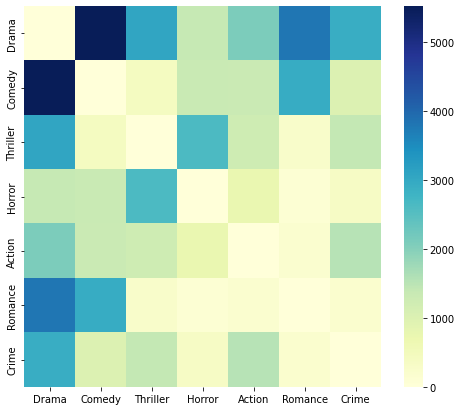

In [ ]:
plt.subplots(figsize=(8, 7))
sns.heatmap(cooc[:7, :7], cmap="YlGnBu", yticklabels = genres[:7], xticklabels = genres[:7]) 
plt.show()

That's a bit more digestable. Now I can see better that, for example Romance & Comedy and Thriller & Horror are also a popular combo. 

**Genre Trends over Time**

To look how the popularity of genres progressed over the last 20 years I need to restructure my data before plotting. It's a little tricky to do nice comparisson: a movie usually has more than one genre, so adding to 100% just as is will not produce reasonable results. To work around this isse I'll do the following:

1. Group the data to get the number of movies in each genre each year. 
2. Get the share of genre presence each year (divide n movies in the genre by total N of movies that year). This will not add to 100%. Nonetheless, this makes the numbers comparable across years. 
3. Plot: here I try bar chart first. But I do not find it intuitive to interpret in this case, so switch to plot. 

In [ ]:
genre_counts = imdb_rated.groupby(['year'])[genres].sum().reset_index() # get the number of movies in each genre each year
genre_counts.head()

,year,Drama,Comedy,Thriller,Horror,Action,Romance,Crime,Adventure,Mystery,...,Family,Fantasy,Animation,Biography,Music,History,Sport,Musical,War,Western
0,1999,594.0,457.0,188.0,90.0,152.0,201.0,148.0,73.0,49.0,...,56.0,52.0,23.0,26.0,26.0,14.0,12.0,2.0,7.0,7.0
1,2000,621.0,439.0,191.0,98.0,161.0,208.0,166.0,92.0,61.0,...,62.0,51.0,38.0,30.0,26.0,9.0,17.0,11.0,9.0,9.0
2,2001,655.0,438.0,208.0,100.0,202.0,221.0,177.0,90.0,89.0,...,48.0,54.0,28.0,16.0,26.0,9.0,19.0,12.0,18.0,7.0
3,2002,699.0,443.0,183.0,116.0,192.0,201.0,173.0,106.0,80.0,...,54.0,52.0,27.0,19.0,25.0,9.0,16.0,18.0,23.0,10.0
4,2003,707.0,523.0,191.0,129.0,193.0,203.0,154.0,112.0,68.0,...,52.0,64.0,31.0,24.0,29.0,14.0,11.0,16.0,16.0,10.0


In [ ]:
genre_counts['total_movies'] = imdb_rated.groupby(['year']).imdbID.count().reset_index().imdbID # add total number of movies each year

In [ ]:
genre_counts[genres] = genre_counts[genres].div(genre_counts.total_movies, axis = 0) #get % of movies in a specific genre for a given year

In [ ]:
genre_counts.head()

,year,Drama,Comedy,Thriller,Horror,Action,Romance,Crime,Adventure,Mystery,...,Fantasy,Animation,Biography,Music,History,Sport,Musical,War,Western,total_movies
0,1999,0.475580,0.365893,0.150520,0.072058,0.121697,0.160929,0.118495,0.058447,0.039231,...,0.041633,0.018415,0.020817,0.020817,0.011209,0.009608,0.001601,0.005604,0.005604,1249
1,2000,0.483268,0.341634,0.148638,0.076265,0.125292,0.161868,0.129183,0.071595,0.047471,...,0.039689,0.029572,0.023346,0.020233,0.007004,0.013230,0.008560,0.007004,0.007004,1285
2,2001,0.495087,0.331066,0.157218,0.075586,0.152683,0.167045,0.133787,0.068027,0.067271,...,0.040816,0.021164,0.012094,0.019652,0.006803,0.014361,0.009070,0.013605,0.005291,1323
3,2002,0.526355,0.333584,0.137801,0.087349,0.144578,0.151355,0.130271,0.079819,0.060241,...,0.039157,0.020331,0.014307,0.018825,0.006777,0.012048,0.013554,0.017319,0.007530,1328
4,2003,0.513435,0.379811,0.138707,0.093682,0.140160,0.147422,0.111837,0.081336,0.049383,...,0.046478,0.022513,0.017429,0.021060,0.010167,0.007988,0.011619,0.011619,0.007262,1377


In [ ]:
genre_counts.drop(['total_movies'], axis = 1, inplace = True) # drop the total number of movies in a year column to make the plotting less of a hassle

In [ ]:
genre_counts = genre_counts[genre_counts.year < 2020] #from years 2020 and 2021

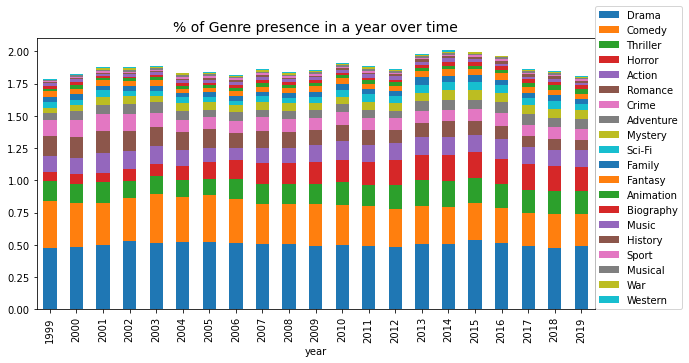

In [ ]:
ax = genre_counts.plot.bar(x = 'year', stacked = True, figsize = (10,5))
ax.set_title('% of Genre presence in a year over time', size = 14)
ax.legend(loc = (1, 0))

As promiced, the numbers don't add up to 1, because movies frequently have more than one genre. 
Based on this plot it looks like Drama is stably popular, Thriller gained popularity after 2005. Horror also got more popular, while Comedy lost a bit. If I start thinking about Paul Bloom theories as to why we watch movies (kind of rehearsing reality) that painst quite a gloomy picture... 

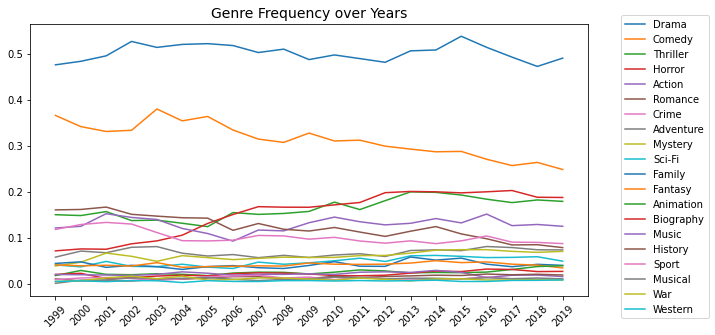

In [ ]:
plt.subplots(figsize = (10, 5))
plt.xticks(genre_counts.year, rotation = 45)
plt.title('Genre Frequency over Years', size = 14)

for g in genres:
  plt.plot(genre_counts.year, genre_counts[g], label = g)

plt.legend(bbox_to_anchor=(1.05, 1.05), loc='upper left')
plt.show()

Now it's much moe visible that Comedy and Romance is losing popylarity, while Horror is taking up. That's an interesting change of taste...

The chart is still quite crowded and the colors kind of repeat, so I'll examine more and less popular genres separately to get a better picture. 

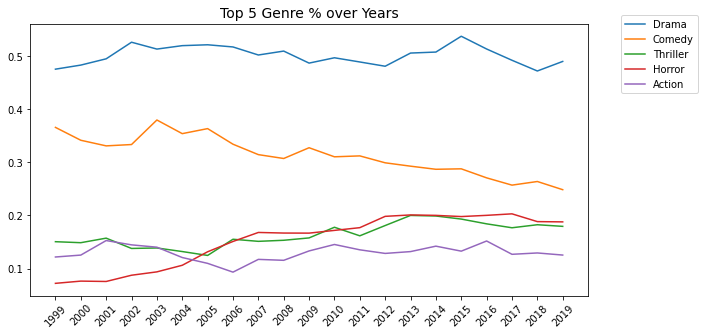

In [ ]:
plt.subplots(figsize = (10, 5))
plt.xticks(genre_counts.year, rotation = 45)
plt.title('Top 5 Genre % over Years', size = 14)

for g in genres[:5]:
  plt.plot(genre_counts.year, genre_counts[g], label = g)

plt.legend(bbox_to_anchor=(1.05, 1.05), loc='upper left')
plt.show()

Can see the Comedy losing and Horror trending up between 2005 and 2012 holding its ground afterwards. 

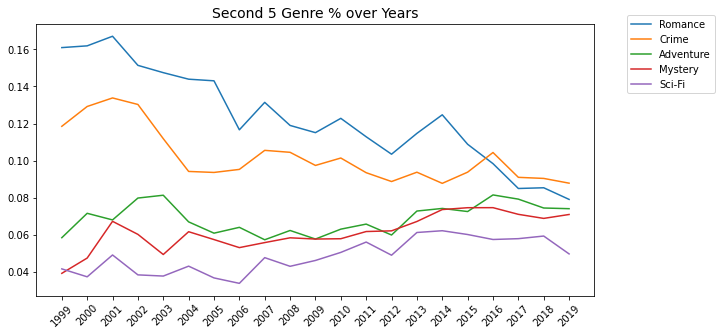

In [ ]:
plt.subplots(figsize = (10, 5))
plt.xticks(genre_counts.year, rotation = 45)
plt.title('Second 5 Genre % over Years', size = 14)

for g in genres[5:10]:
  plt.plot(genre_counts.year, genre_counts[g], label = g)

plt.legend(bbox_to_anchor=(1.05, 1.05), loc='upper left')
plt.show()

Here we go: Romance is dead :)... Ok, not dead, but kinda dieing.

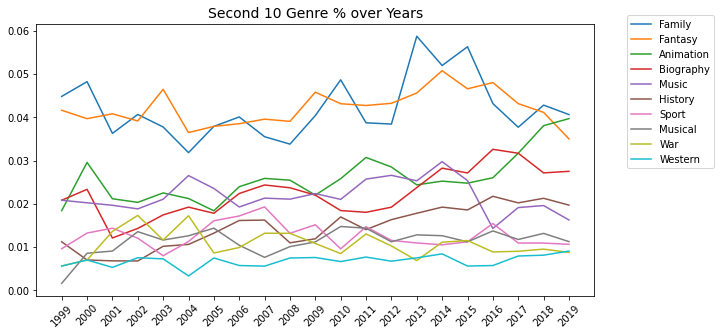

In [ ]:
plt.subplots(figsize = (10, 5))
plt.xticks(genre_counts.year, rotation = 45)
plt.title('Second 10 Genre % over Years', size = 14)

for g in genres[10:]:
  plt.plot(genre_counts.year, genre_counts[g], label = g)

plt.legend(bbox_to_anchor=(1.05, 1.05), loc='upper left')
plt.show()

**Conclusions**

From this brief exploration I can already see that:
* the movies are on average stably ok across the years. 
* Yet, the industry is growing liearly producing more movies every year. I guess there will be a dip in 2020 and 2021 because of COVID-19, but things will likely take up after. 
* Duration of movies is part of artistic expression and should be processed before the analysis. 
* Some genres fit better to each other than others. 
* The popularity of genres experinces a time trend with more gloomy genres increasing. 

As promiced this was a very brief exploration of the data. There is more that one can do. For example, checking whether a movie genre combination (e.g. more/less original) movie combination has an effect on the rating. Additionally, synopsys could have some insights about the movie rating as well. Here, however, one should analyze carefully, because synopsys is generated by the crowd. This could result in sylistically different texts that could add noise when extracting semantics. 